# STAT 207 Group Lab Assignment 12 - [10 total points]

## Classifiers

<hr>

## <u>Lab Grading</u>:

Should we grade your submission?  If not, write the netID of the submission to be graded.  (Note: We will only grade one assignment per group, and we'll pick the first one that says we should grade that submission.  We will assign the same grade to all team members.)

*For example*, you might respond: **grade this submission** or **my submission is under netID jdeeke**

**grade this submission**

If you said **my submission is under netID** above, we will not read any more of your lab submission.

If you said **grade this submission** above, who worked with you on this submission?  Write both their **names** and **netIDs**.  

Also, discuss and record if you attended a University of Illinois basketball game this past season.

Joonwoo Ha(ha47): Attended
Soobin Jang(soobinj2): didn't attended

## <u>Purpose</u>:
You should work in groups of 2-3 on this report (not working in groups without permission will result in a point deduction). The purpose of this group lab assignment is to create and evaluate a classifier, followed by tuning our classifier based on its future use.
<hr>

## <u>Assignment Instructions</u>:

### Group Roles

Suggested and specified roles are provided below: 

#### Groups of 2

* **Driver**: This student will type the report.  While typing the report, you may be the one who is selecting the functions to apply to the data.
* **Navigator**: This student will guide the process of answering the question.  Specific ways to help may include: outlining the general steps needed to solve a question (providing the overview), locating examples within the course notes, and reviewing each line of code as it is typed.

#### Groups of 3

* **Driver**: This student will type the report.  They may also be the one to select the functions to apply to the data.
* **Navigator**: This student will guide the process of answering the question.  They may select the general approach to answering the question and/or a few steps to be completed along the way. 
* **Communicator**: This student will review the report (as it is typed) to ensure that it is clear and concise.  This student may also locate relevant examples within the course notes that may help complete the assignment.

<hr>

### Imports

In [1]:
#Run this
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()  

## Case Study: Understanding NBA Longevity

We will look at data collected on rookies in the NBA from 1980-2016 to determine if the rookies are successful and still playing in the NBA after 5 years.  The available variables include the following **per game** statistics:

- **GP**: number of games played
- **MIN**: number of minutes played per game
- **PTS**: number of points scored per game
- **FGM**: number of field goals made per game
- **FGA**: number of field goals attempted per game
- **FG%**: percentage of field goals made per game
- **3P Made**: number of 3-point field goals made per game
- **3PA**: number of 3-point field goals attempted per game
- **3P%**: percentage of 3-point field goals made per game
- **FTM**: number of free throws made per game
- **FTA**: number of free throws attempted per game
- **FT%**: percentage of free throws made per game
- **OREB**: number of offensive rebounds per game
- **DREB**: number of defensive rebounds per game
- **REB**: total number of rebounds per game
- **AST**: number of assists per game
- **STL**: number of steals per game
- **BLK**: number of blocks per game
- **TOV**: number of turnovers per game
- **TARGET_5Yrs**: whether the player is still playing in the NBA after 5 years (1 = playing, 0 = not playing)

The code cell below will read in the data for you.  Be sure to run the cell. 

In [3]:
df = pd.read_csv('nba_rookie.csv')
df

,Name,GP,MIN,PTS,FGM,FGA,FG_Perc,3P Made,3PA,3P_Perc,...,FTA,FT_Perc,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1305,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1306,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1307,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


### 1. [5 points] Fit a Classifier

Recall that in Lab 11, we built a logistic regression model to predict whether a player will last for 5 years or more in the NBA from four variables in the data (of your choosing).  We will continue exploring this data in Lab 12.

**a)** Fit a model predicting whether the player lasts 5 years or more in the NBA from four of the other variables in the data.  You may pick the combination of four variables to use as predictors.  You may choose to use the same variables from Lab 11, or you may explore a different combination of variables.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['PTS', 'AST', 'REB', 'TOV']]
y = df['TARGET_5Yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

**b)** Generate the predictive probabilities from your model, and save them as a new column in the existing data.

In [6]:
df['prob_TARGET_5Yrs'] = model.predict_proba(X)[:, 1]
df

,Name,GP,MIN,PTS,FGM,FGA,FG_Perc,3P Made,3PA,3P_Perc,...,FT_Perc,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,prob_TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0,0.762537
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0,0.703474
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0,0.561091
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1,0.545902
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1,0.541968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0,0.500370
1305,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1,0.518998
1306,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0,0.659034
1307,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1,0.459719


**c)** Generate predictions for a classifier with a predictive probability threshold of 0.5.  Save these predictions as a new column in your existing data.

In [7]:
df['pred_TARGET_5Yrs'] = (df['prob_TARGET_5Yrs'] >= 0.5).astype(int)

**d)** Generate the confusion matrix for the classifier from part **c**.

In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, df['pred_TARGET_5Yrs'])
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[223 262]
 [166 658]]


**e)** Calculate (and report) the accuracy rate, sensitivity, and specificity for this classifier.  You may do this completely using code, or you may use Python as a calculator below.

In [9]:
TN, FP, FN, TP = cm.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

Accuracy: 0.6730
Sensitivity (Recall): 0.7985
Specificity: 0.4598


### 2. [5 points] Selecting a Better Threshold

We used the "default" predictive probability threshold of 0.5 in Question 1 above.  We should question if this is an ideal threshold and will therefore aim to select our threshold more systematically.

**a)** Suppose that we are part of the coaching staff for an NBA team, and we would like to recruit young players from other teams who we anticipate will still be playing after 5 years in the league.  We don't want to waste our time recruiting young players who will not still be playing in the NBA at the end of their contract.

What type of error would be worse for a classifier?  Therefore, what type of error should we reduce?  And would you anticipate that the predictive probability threshold would increase or decrease?

In this context, False Negatives are worse because we would miss out on recruiting players who would have succeeded in the NBA for 5+ years. Therefore, we should reduce False Negatives, which would require increasing sensitivity (recall), even at the cost of allowing more False Positives.
This means the predictive probability threshold should be decreased (i.e., lower than 0.5) so that the model is more likely to predict 1 (long career).

**b)** Generate the ROC curve for the model from Question 1.

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_true = df['TARGET_5Yrs']
y_scores = df['prob_TARGET_5Yrs']

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

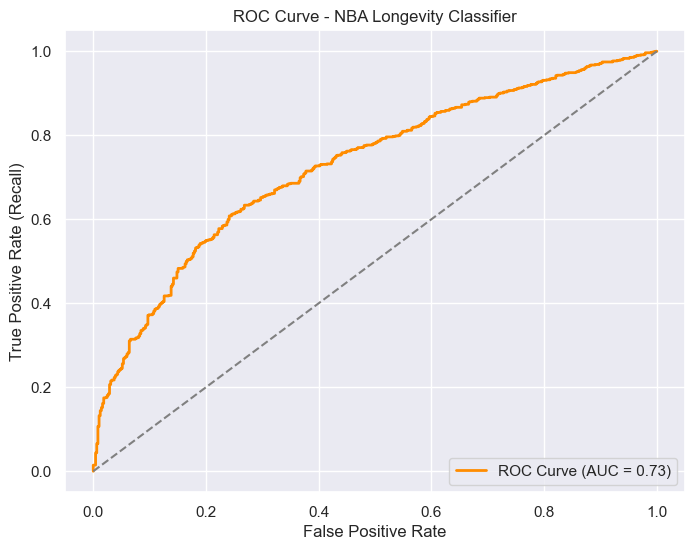

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - NBA Longevity Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**c)** Select and identify the value for an "ideal" threshold using your ROC curve from **part b** and the errors to be minimized from **part a**.

In [12]:
youden_index = tpr - fpr
best_index = youden_index.argmax()
ideal_threshold = thresholds[best_index]

print(f"Ideal Threshold (Youden's J): {ideal_threshold:.4f}")

Ideal Threshold (Youden's J): 0.6341


Ideal threshold: 0.63

**d)** Report the strength of the model when used as a classifier.  (*Hint*: this can be found from the ROC curve above).  If time, compare your model to another lab group and indicate which model performs better.

In [13]:
from sklearn.metrics import confusion_matrix

df['pred_TARGET_5Yrs_ideal'] = (df['prob_TARGET_5Yrs'] >= ideal_threshold).astype(int)

cm_ideal = confusion_matrix(y_true, df['pred_TARGET_5Yrs_ideal'])
TN, FP, FN, TP = cm_ideal.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Confusion Matrix with Ideal Threshold:")
print(cm_ideal)
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


Confusion Matrix with Ideal Threshold:
[[368 117]
 [323 501]]
Accuracy: 0.6639
Sensitivity (Recall): 0.6080
Specificity: 0.7588


After adjusting the predictive probability threshold from the default 0.5 to an ideal value of 0.6341, the classifier's specificity significantly improved from 0.4598 to 0.7588. This means the model is now much better at correctly identifying players who will not last 5 years in the NBA (TN). Although the sensitivity dropped from 0.7985 to 0.6080, this trade-off is acceptable in contexts where it's more critical to avoid FP. The overall accuracy changed only slightly from 0.6730 to 0.6639, suggesting that tuning the threshold improved the model’s balance between sensitivity and specificity without heavily affecting overall correctness.